In this project I have done data prepossesing and some visualization to get some insights from the data. 

Disclaimer- I have not build any model here as I am yet to learn those topics :)

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [54]:
df=pd.read_csv("Big mart sales.csv")

In [55]:
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [57]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [58]:
#Given data has 12 columns and 8523 entries.
df.shape

(8523, 12)

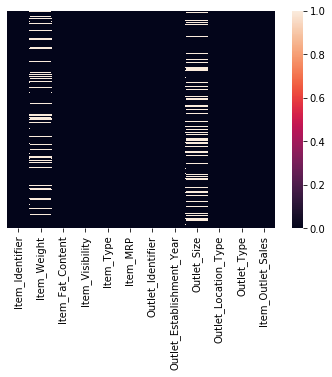

In [59]:
#Now let's see where we have missing values. 
sns.heatmap(df.isnull(),yticklabels=False);

* Here **Item_Weight** and **Outlet_size** have so many missing values.
* Let's observe it numerically!!

In [60]:
#Count of missing values for each column.
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**Now it's time to fill the missing value!!!**

In [61]:
#Since 'Item_Weight' is a numerical value, so we can fill it by mean or median.
#Here I choose to use median. Mean would also works fine.
df['Item_Weight'].fillna(df['Item_Weight'].median(),inplace=True)

In [62]:
#'Outlet_size' is a categorical value, so we can fill it by mode.
#Here I use 'pad' method to keep the randomness.
#Method 'pad' fill values forward.
df['Outlet_Size'].fillna(method='pad',inplace=True)

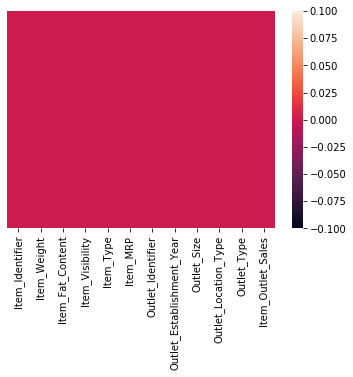

In [63]:
sns.heatmap(df.isnull(),yticklabels=False);

From the heatmap, it seems there is no null values in the data.

Let's observe it numerically.

In [64]:
#Count of missing values for each column.
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

**Yaayyy!!!** Finally our data has no null values.

**Now It's time to look into categorical variables.**

In [65]:
#Categorical variables
df.dtypes[df.dtypes.values=='O'].index

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [66]:
#Here one value is represented as many names.
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [67]:
#'low fat' and 'LF' can be identified as 'Low Fat' and 'reg' as 'Regular'.
#So we will replace them as follows.
df['Item_Fat_Content'].replace(['low fat','LF'],'Low Fat',inplace=True)
df['Item_Fat_Content'].replace('reg','Regular',inplace=True)

In [68]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

Now It looks good.

In [69]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [70]:
df['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [71]:
df['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

There are 3 types of location for outlet.

In [72]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

There are total 4 types of outlet in which 3 of them are Supermarket and 1 Grocery Store in the data.

**Okayyy!!** Our data is clean now.

**Now let's do some visualization!!**

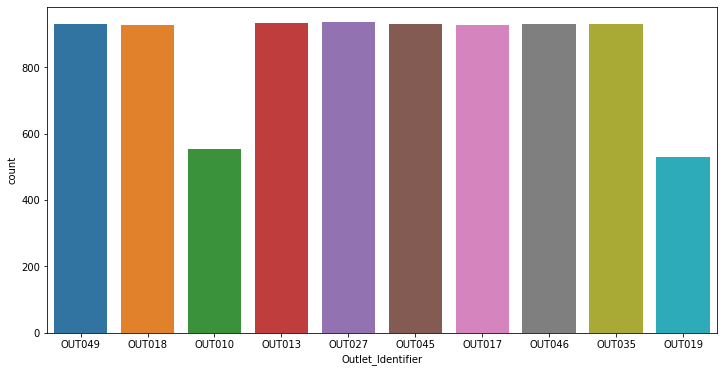

In [73]:
plt.figure(figsize=(12,6))
sns.countplot(df['Outlet_Identifier'],data=df);

* Outlet **OUT010** and **OUT019** are selling comparatively less number of items. 

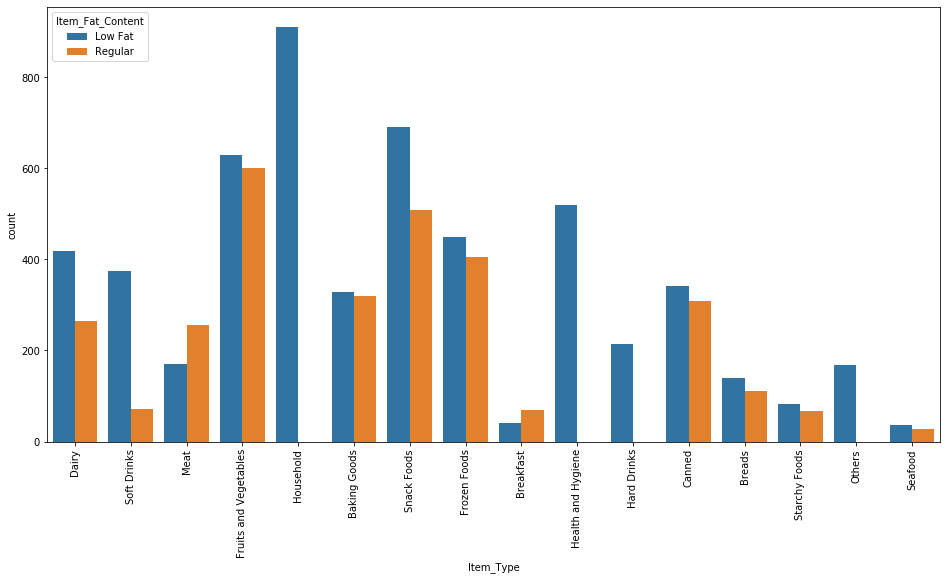

In [74]:
plt.figure(figsize=(16,8))
typ=df.groupby('Item_Type')['Item_Type'].count().sort_values(ascending=False)
g=sns.countplot('Item_Type',data=df,hue='Item_Fat_Content')
g.set_xticklabels(g.get_xticklabels(),rotation=90);

* All **Household** ,**Health and Hyginene** and **Hard Drinks** products are entirely low fat products.

In [75]:
df.groupby('Item_Type')['Item_Type'].count().sort_values(ascending=False)

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

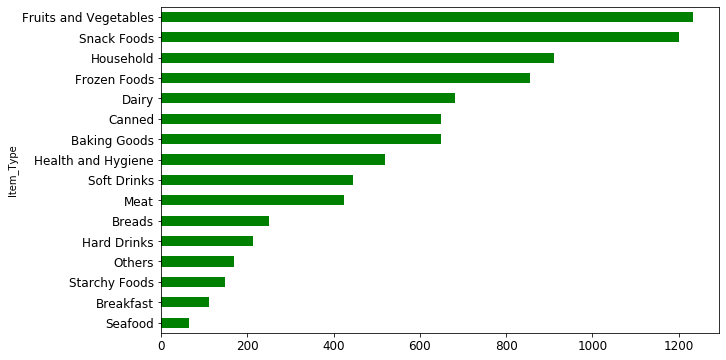

In [76]:
plt.figure(figsize=(10,6))
df.groupby('Item_Type')['Item_Type'].count().sort_values().plot(kind='barh',fontsize=12,color='Green')
plt.show()

* So **Fruits and Vegetables** and **Snack Foods** are top most selling items in the market. 

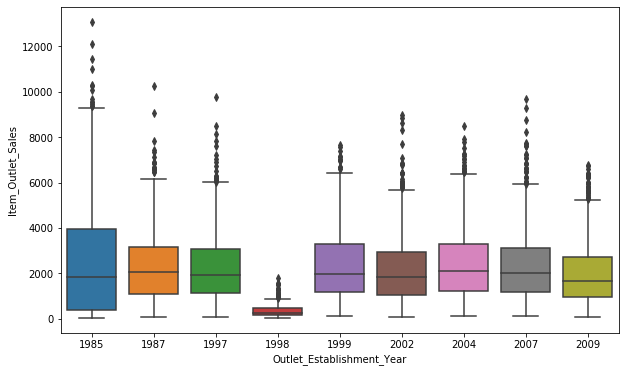

In [77]:
#Outlet_Establishment_Year vs Item_Outlet_Sales
plt.figure(figsize=(10,6))
sns.boxplot(df['Outlet_Establishment_Year'],df['Item_Outlet_Sales']);

In **1985**, there is a large range of sales. There will be two possibilies: 
1. Outlets established in 1985 are too old and may be famous, so people may prefer to buy items from there. or
2. There will be so many outlets established in 1985.

Also in **1998**, there is a significantly small range of sales.

Let's see what actually the case is!!!

In [78]:
#Extracting Outlet_Identifier and it's establishment year.
df[['Outlet_Establishment_Year','Outlet_Identifier']].groupby(['Outlet_Establishment_Year','Outlet_Identifier']).count()

Empty DataFrame
Columns: []
Index: [(1985, OUT019), (1985, OUT027), (1987, OUT013), (1997, OUT046), (1998, OUT010), (1999, OUT049), (2002, OUT045), (2004, OUT035), (2007, OUT017), (2009, OUT018)]

Clearly **2** outlets(**OUT019 and OUT027**) are established in **1985**. That's why we have got the large range of sales in **1985**.

Now let's see the case for **1998**.

**OUT010** was established in **1998** and we have seen **OUT010** has less number of sales.
That's why we are getting small range of sales in **1998**.

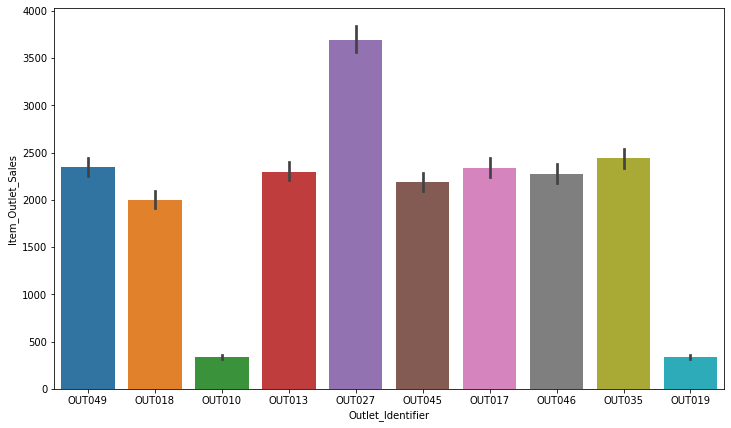

In [79]:
#Outlet_Identifier Vs Item_Outlet_Sales
plt.figure(figsize=(12,7))
sns.barplot(df['Outlet_Identifier'],df['Item_Outlet_Sales']);

Significantly outlet **OUT027** has **max** sales and as expected **OUT010** and **OUT019** will have **lowest** sales as they sell less products. 

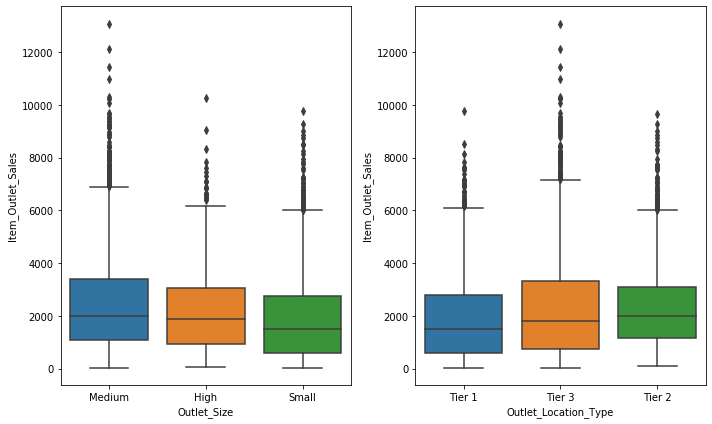

In [80]:
#boxplots with respect to Item_Outlet_Sales.
fig,axes=plt.subplots(1,2,figsize=(10,6))
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',ax=axes[0],data=df)
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',ax=axes[1],data=df)

plt.tight_layout()

* Sales does not depend on **Outlet_Size** and **Outlet_Location_Type** that much but it depends on **Outlet_Type** though.

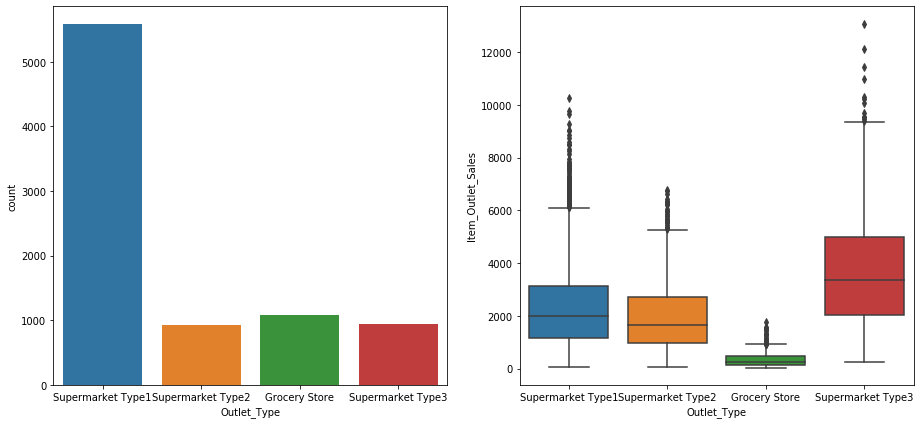

In [81]:
fig,axes=plt.subplots(1,2,figsize=(13,6))
sns.countplot('Outlet_Type',ax=axes[0],data=df)
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',ax=axes[1],data=df);
plt.tight_layout()

* **Supermarket Type1** sales maximum number of distinct products.
* But we can see that inspite of having less sales of distinct products, Supermarket Type3 has max sales.That means, Supermarket Type3 dominates total sales quantity-wise.
* Thus people are buying so many distinct products from **Supermarket Type1** but quantity wise it's not that much.
* On the other hand, people are not buying that many distinct product from **Supermarket Type3** but quantity wise it dominates others. 

* As expected **Grocery Store** has less sales as it's not big like supermarkets.

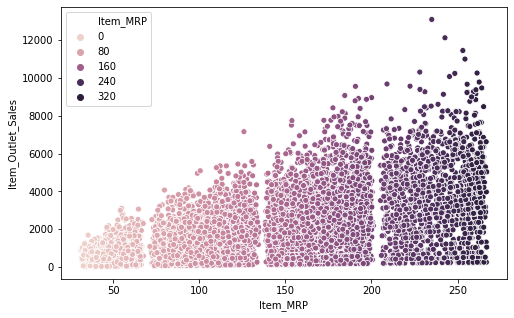

In [82]:
# MRP vs Sales
plt.figure(figsize=(8,5))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',hue='Item_MRP',data=df);

* As the MRP of item increases, Sales also increases.

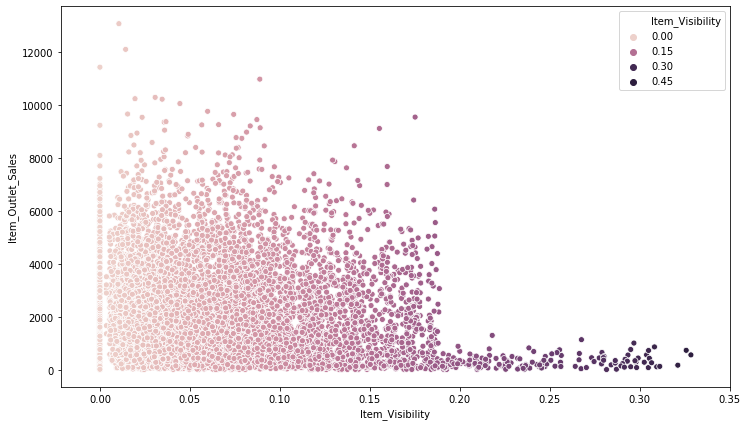

In [83]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',hue='Item_Visibility', data=df);

* If the **item visibility** is less than **0.12**, then comparatively the sales are **higher**.

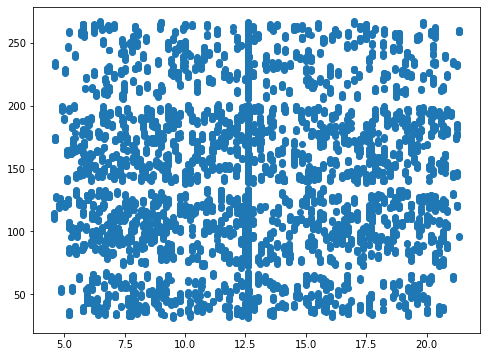

In [84]:
plt.figure(figsize=(8,6))
plt.scatter(df['Item_Weight'],df['Item_MRP']);

* There is no useful relation between **Item_Weight** and **Item_MRP**. So Price of items doesn't depend on their weights
which is quite obvious.

**Thank You**